# **Wikipedia: blocking of users and policies**


## Library Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv 
import matplotlib.gridspec as gridspec
# import json
import datetime as dt
import scipy.stats as stat
import seaborn as sns
from sklearn import preprocessing


# setting plotting parameters
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = 'gray'

## Load and prepare the dataset for visualisation

In [2]:
# setting up the working directory in local machine 

folder = "../data"
folder_result = "../results"

Load dataset.

In [45]:
file = '/merged_data/merged_data_2005-2023.csv'

old_df = pd.read_csv(folder+file)

Smooth out outliers: the editor and administrator data in August 2023 is an outlier, due to problems in the retrieved data


In [46]:
outlier_idx = old_df[old_df['month'] == '2023-08-01'].index[0]

In [47]:
for col in old_df:
    if ('n_' in col) and (('admin' in col)| ('editor' in col)):
        old_df.loc[outlier_idx, col] = (old_df.loc[outlier_idx-1, col] + old_df.loc[outlier_idx+1, col])/2

In [48]:
old_df.iloc[220:225, :]

,month,editors.anonymous,editors.user,editors.name-bot,editors.group-bot,editors.total,active-editors.total,edits.anonymous,edits.user,edits.name-bot,...,n_editor_user,n_editor_all_block,n_editor_ip_block,n_editor_bot_block,n_editor_user_block,n_editor_all_unblock,n_editor_ip_unblock,n_editor_bot_unblock,n_editor_user_unblock,tag_number
220,2023-05-01,232305,121713,79.0,115.0,354212.0,37874,654055,3476264,6369.0,...,7062,355352.0,348321,0,7031.0,134.0,17,0.0,117,58
221,2023-06-01,216696,113893,69.0,114.0,330772.0,35416,624870,3406082,6252.0,...,6526,374778.0,368287,0,6491.0,127.0,22,0.0,105,58
222,2023-07-01,221848,117076,68.0,113.0,339105.0,37210,656172,3582227,7444.0,...,7092,391514.0,384455,0,7059.0,123.0,16,0.0,107,58
223,2023-08-01,218541,121026,78.0,114.0,339759.0,37763,618094,3550686,6715.0,...,7128,418363.5,411268,0,7095.5,139.5,34,0.5,105,58
224,2023-09-01,219391,120653,72.0,116.0,340232.0,38760,610776,3220975,10965.0,...,7164,445213.0,438081,0,7132.0,156.0,52,1.0,103,58


Create a date key

In [71]:
old_df['month'] = pd.to_datetime(old_df['month'])
old_df['year_month'] = old_df['month'].dt.to_period('M')
old_df['year_month']

0      2005-01
1      2005-02
2      2005-03
3      2005-04
4      2005-05
        ...   
223    2023-08
224    2023-09
225    2023-10
226    2023-11
227    2023-12
Name: year_month, Length: 228, dtype: period[M]

Generate a new dataframe

In [72]:
# generate a new dataframe, where each row is a day for the visulisation
start_date = '2005-01-01'
end_date = '2023-12-31'
date_range = pd.date_range(start=start_date, end=end_date)
new_df = pd.DataFrame({'day': date_range})
new_df['day'] = pd.to_datetime(new_df['day'])

# Merge two dataframes
new_df['year_month'] = new_df['day'].dt.to_period('M')

In [73]:
new_df['year_month'] 

0       2005-01
1       2005-01
2       2005-01
3       2005-01
4       2005-01
         ...   
6934    2023-12
6935    2023-12
6936    2023-12
6937    2023-12
6938    2023-12
Name: year_month, Length: 6939, dtype: period[M]

Merge the dataset

In [74]:
df = new_df.merge(old_df, how='left', on='year_month')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6939 entries, 0 to 6938
Data columns (total 65 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   day                             6939 non-null   datetime64[ns]
 1   year_month                      6939 non-null   period[M]     
 2   month                           6939 non-null   datetime64[ns]
 3   editors.anonymous               6939 non-null   int64         
 4   editors.user                    6939 non-null   int64         
 5   editors.name-bot                6939 non-null   float64       
 6   editors.group-bot               6939 non-null   float64       
 7   editors.total                   6939 non-null   float64       
 8   active-editors.total            6939 non-null   int64         
 9   edits.anonymous                 6939 non-null   int64         
 10  edits.user                      6939 non-null   int64         
 11  edit

# **Part C:** Figure to produce for the Poster

## Figure 1- **Editors**: In this figure we need to include:
1. Line plot of the editors over time (features == editors.anonymous, editors.users)

All with respect to time (Months on the X axis)

In [114]:
import matplotlib.dates as mdates

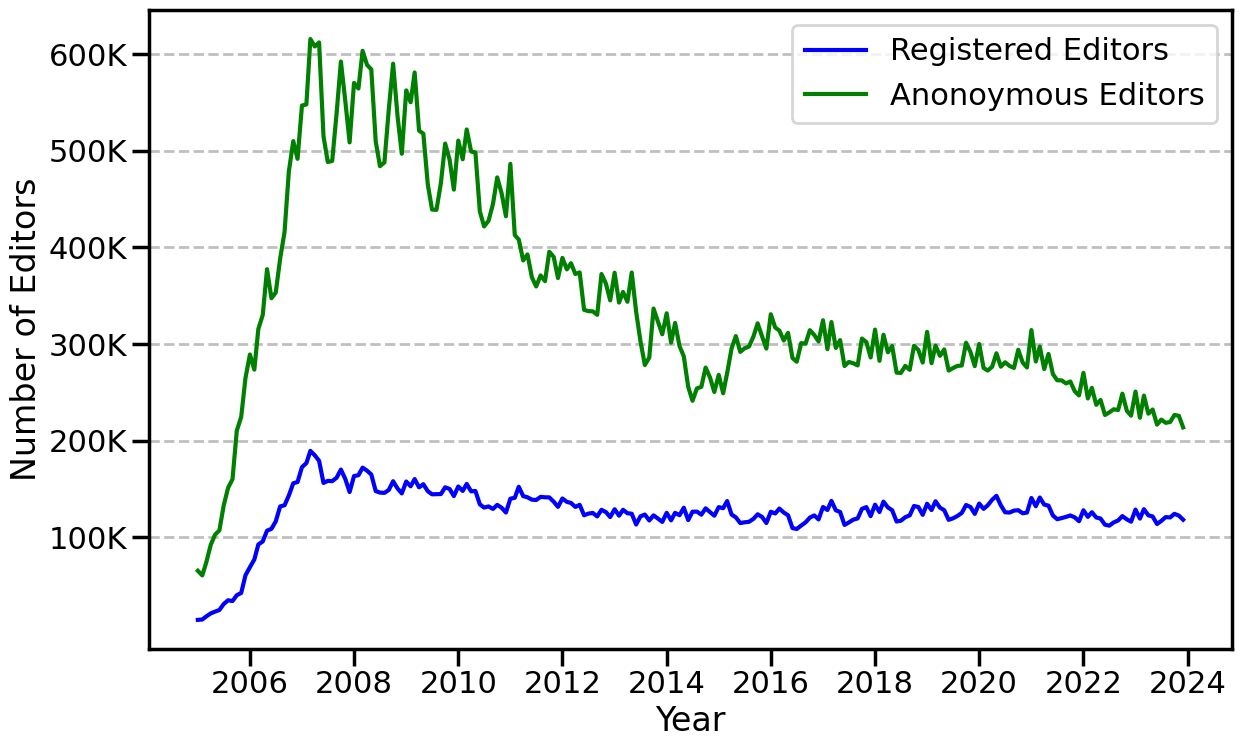

In [121]:
sns.set_context("poster")

fig, ax = plt.subplots(figsize=(8*1.618,8))

ax.plot(df['month'], df['editors.user'], label = 'Registered Editors', lw=3.0, color='blue')
ax.plot(df['month'], df['editors.anonymous'], label = 'Anonoymous Editors', lw=3.0, color='green')

ax.yaxis.grid(True, linestyle='--', alpha=0.5)
ax.xaxis.grid(False)

plt.xticks()
plt.xlabel('Year')
plt.yticks(range(100000, 700000, 100000), ['100K', '200K', '300K', '400K', '500K', '600K'])
plt.ylabel('Number of Editors')

plt.legend()

plt.tight_layout()
plt.show()

## Figure 2- **Edits**: In this figure we need to include:
1. Line plot of the edits over time (features == edits.anonymous, edits.users)

All with respect to time (Months on the X axis)

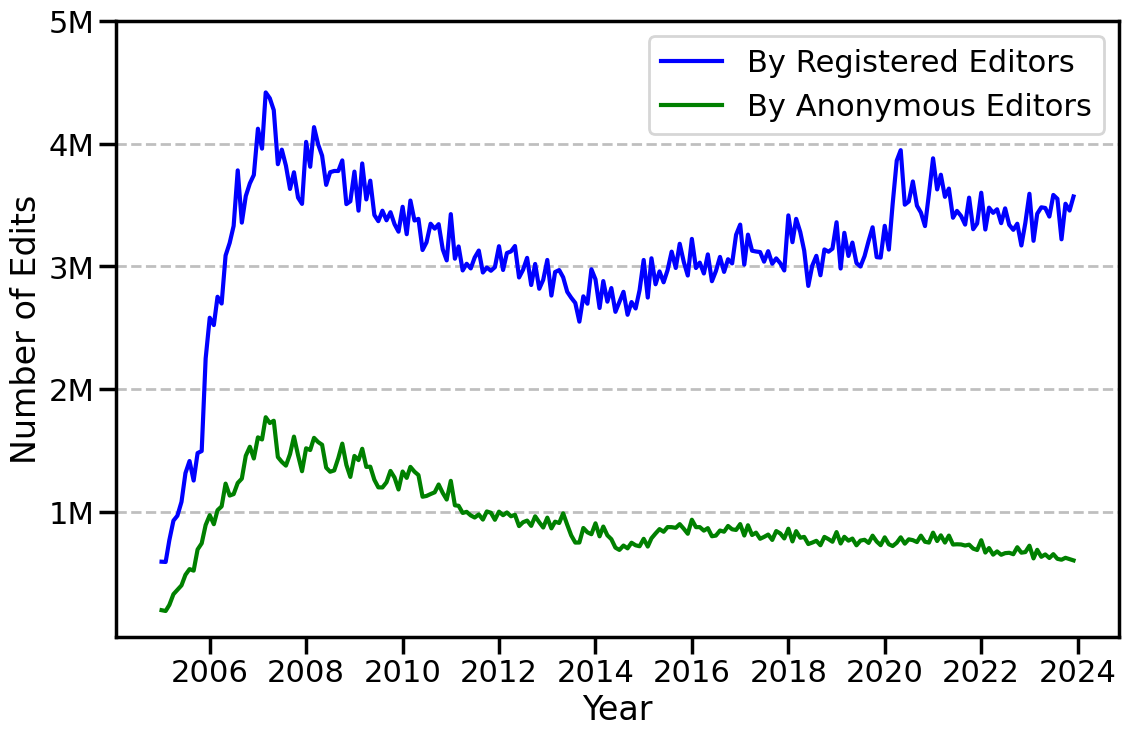

In [122]:
sns.set_context("poster")

fig, ax = plt.subplots(figsize=(8*1.618,8))

ax.plot(df['month'], df['edits.user'], label = 'By Registered Editors', lw=3.0, color='blue')
ax.plot(df['month'], df['edits.anonymous'], label = 'By Anonymous Editors', lw=3.0, color='green')

ax.yaxis.grid(True, linestyle='--', alpha=0.5)
ax.xaxis.grid(False)

plt.xticks()
plt.xlabel('Year')

plt.ylabel('Number of Edits')
plt.yticks(range(1000000, 6000000, 1000000), ['1M', '2M', '3M', '4M', '5M'])

plt.legend(loc='upper right')

plt.show()

## Figure 3- **Policy**: In this figure we need to include: 
1. Bar Plot of Policy Evolution

All with respect to time (Months on the X axis)

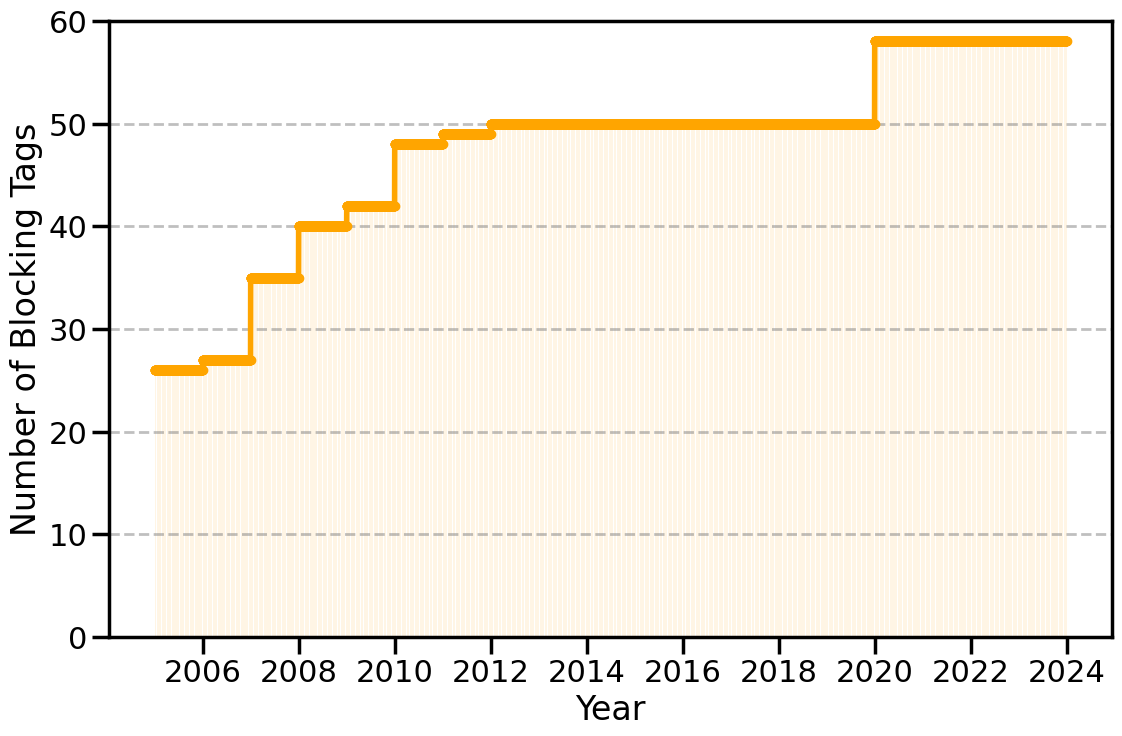

In [123]:
sns.set_context("poster")

fig, ax = plt.subplots(figsize=(8*1.618,8))

ax.plot(df['day'], df['tag_number'], color = 'orange', marker='.', lw=4.0, alpha=1, label='Policies')
ax.bar(df['day'], df['tag_number'], color = 'orange', alpha=0.1)

ax.yaxis.grid(True, linestyle='--', alpha=0.5)
ax.xaxis.grid(False)

plt.title("")

plt.ylabel('Number of Blocking Tags')
plt.xlabel('Year')

plt.ylim(0, 60)
plt.show()

## Figure 4- **No. of editors blocked**: In this figure we need to include: 
1. Line plot of blocked editors (n_editor_user_block, n_editor_ip_block )

All with respect to time (Months on the X axis)

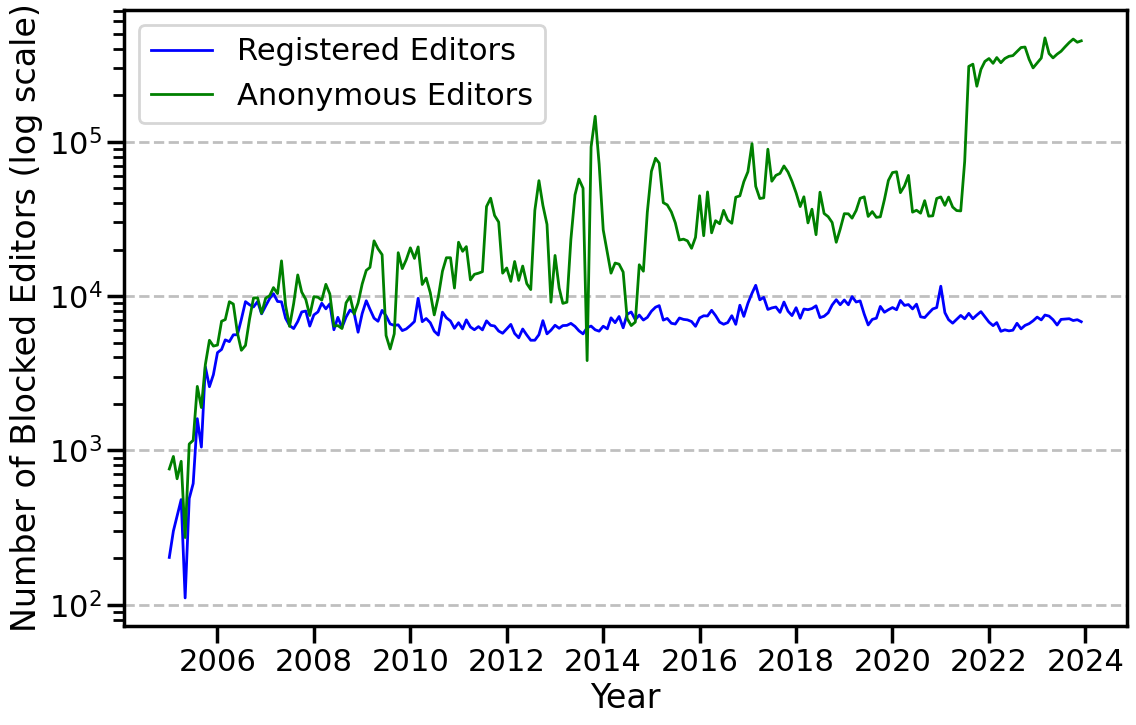

In [128]:
sns.set_context("poster")

fig, ax = plt.subplots(figsize=(8*1.618,8))

ax.plot(df['month'], df['n_editor_user_block'], label = 'Registered Editors', lw=2.0, color='blue')
ax.plot(df['month'], df['n_editor_ip_block'], label = 'Anonymous Editors', lw=2.0, color='green')

ax.yaxis.grid(True, linestyle='--', alpha=0.5)
ax.xaxis.grid(False)

plt.title("")
plt.xticks()
plt.xlabel('Year')

plt.yscale('log')
plt.ylabel('Number of Blocked Editors (log scale)')

plt.legend()
plt.show()

## Figure 5- **Policy Barplot & Ratio Line**: In this figure we need to include: 
1. Ratio plots (Blocked vs Editors)
2. Policy Evolution Barplot
   
All with respect to time (Months on the X axis)

In [84]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

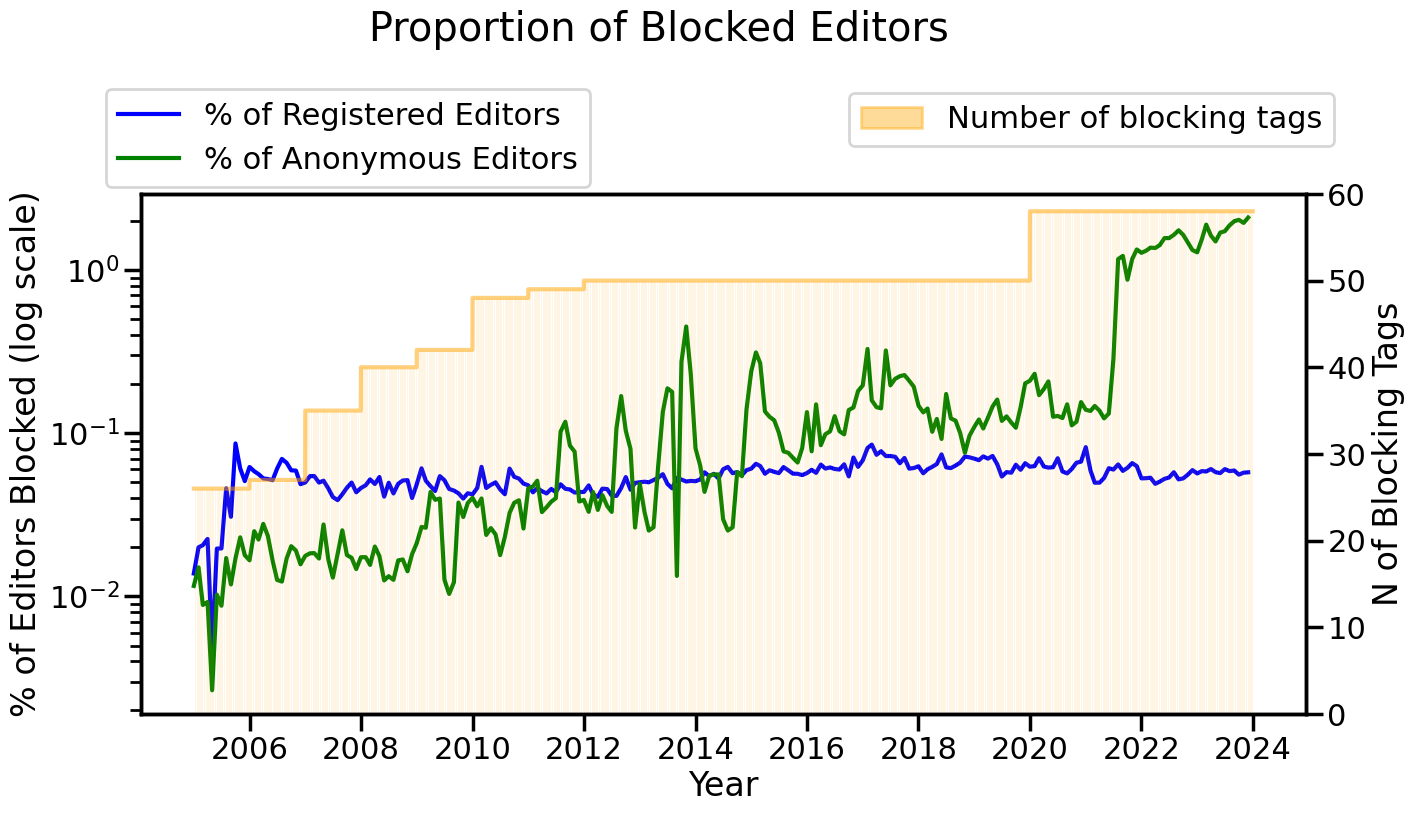

In [134]:
sns.set_context("poster")

fig, ax1 = plt.subplots(figsize=(8*1.618,8))

# Plotting line plots
# ax1.set_title("Ratio line plot and Policy Bar Plot")
ax1.plot(df['month'], (df['n_editor_user_block']/df['editors.user']), label = 'Registered Editors', lw=3.0, color='blue')
ax1.plot(df['month'], (df['n_editor_ip_block']/df['editors.anonymous']), label = 'Anonymous Editors', lw=3.0, color='Green')
plt.yscale('log')

# Plotting bar plot on secondary axis
ax2 = ax1.twinx()
ax2.plot(df['day'], df['tag_number'], color = 'orange', marker='', lw=3.0, alpha=0.5, label='Policies')
ax2.bar(df['day'], df['tag_number'], color = 'orange', alpha=0.1)
# ax2.fill_between(df['month'], df['tag_number'], color = 'red', alpha=0.3, label='Policies')
ax2.set_ylim(0, 60)

ax1.set_xlabel('Year')
ax1.set_ylabel('% of Editors Blocked (log scale)')
ax2.set_ylabel('N of Blocking Tags')

fig.suptitle('Proportion of Blocked Editors')

ax1.xaxis.grid(False)
ax1.yaxis.grid(False)
ax2.xaxis.grid(False)
ax2.yaxis.grid(False)

# Set legends on right y axis
line_legend_elements = [Line2D([0], [0], color='blue', lw=3.0), Line2D([0], [0], color='green', lw=3.0)]
fig.legend(handles=line_legend_elements, labels=['% of Registered Editors', '% of Anonymous Editors'], loc=(0.075, 0.77), frameon=True)


# Set legends on right y axis
bar_legend_elements = [Patch(facecolor='orange', alpha=0.4, edgecolor='orange', label='Number of blocking tags')]
fig.legend(handles=bar_legend_elements, loc=(0.6, 0.82), frameon=True)

# Adjust layout to prevent overlapping of labels
plt.subplots_adjust(left=0.1, bottom=0.1, right=1, top=0.75)
plt.xticks(rotation=45)
plt.show()


In [135]:
df['editors.anonymous']

0        65476
1        65476
2        65476
3        65476
4        65476
         ...  
6934    213825
6935    213825
6936    213825
6937    213825
6938    213825
Name: editors.anonymous, Length: 6939, dtype: int64